## What is pandas

Pandas is a Python library for data manipulation and analysis 

Pandas allows importing data from various file formats such as 
-   comma-separated values, 
-   JSON, 
-   SQL, 
-   Microsoft Excel

Pandas allows various data manipulation operations such as 
-   merging
-   reshaping
-   selecting
-   data cleaning
-   data wrangling  
      -  Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.)

### this is how a pandas dataframe look like

dataframe is a tabular data structure with labeled rows and columns
as an example we see below the rows are indexed with an integer numbers. 

In [71]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

## getting the list of available datasets

In [237]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [324]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes.head(4)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR


In [299]:
car_crashes.tail(4)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


## measuring statistical values

In [323]:
stats = {}

stats['mean'] = car_crashes.ins_premium.mean()

stats['std'] = car_crashes.ins_premium.std()

stats['sum'] = car_crashes.ins_premium.sum()

stats['count'] = car_crashes.ins_premium.count()


stats['min'] = car_crashes.ins_premium.min()

stats['1st quantile'] = car_crashes.ins_premium.quantile(0.25) 

stats['median'] = car_crashes.ins_premium.median()

stats['3rd quantile'] = car_crashes.ins_premium.quantile(0.75)

stats['max'] = car_crashes.ins_premium.max()

pd.DataFrame(stats,index=['value']).T

,value
mean,886.957647
std,178.296285
sum,45234.840000
min,641.960000
1st quantile,768.430000
median,858.970000
3rd quantile,1007.945000
max,1301.520000


In [333]:
flights = sns.load_dataset('flights')
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## changin index column
It doesn't have to be integers. 
Let's change it to a different column 

In [63]:
diamonds = sns.load_dataset('diamonds')
diamonds.set_index('cut').head(6)

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Ideal,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
Premium,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
Good,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
Premium,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
Good,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75
Very Good,0.24,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [4]:
print('------------------------------------------------')
print(f'Data type: {type(diamonds)}')
print('------------------------------------------------')
print(f'Data size: {diamonds.shape}')
print('------------------------------------------------')

------------------------------------------------
Data type: <class 'pandas.core.frame.DataFrame'>
------------------------------------------------
Data size: (53940, 10)
------------------------------------------------


it allows easy extraction of data from within the dataframe. for example let's say we want to extract all samples with Good Cut

In [6]:
diamonds_cut_good = diamonds[diamonds.cut=='Good']

print('-----------------------------------------------------------')
print(f'number of diamonds with Good cut are: {diamonds_cut_good.shape[0]} / (out of {diamonds.shape[0]})')
print('-----------------------------------------------------------')

diamonds_cut_good.head()


-----------------------------------------------------------
number of diamonds with Good cut are: 4906 / (out of 53940)
-----------------------------------------------------------


,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
17,0.30,Good,J,SI1,63.4,54.0,351,4.23,4.29,2.70
18,0.30,Good,J,SI1,63.8,56.0,351,4.23,4.26,2.71


## how to get the columns list

In [8]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## how to get the index list

In [13]:
diamonds.index

RangeIndex(start=0, stop=53940, step=1)

In [14]:
diamonds_cut_good.index

Int64Index([    2,     4,    10,    17,    18,    20,    35,    36,    37,
               42,
            ...
            53840, 53886, 53890, 53895, 53897, 53913, 53914, 53916, 53927,
            53936],
           dtype='int64', length=4906)

## slicing dataframs (just like numpy arrays & lists)

In [29]:
diamonds.iloc[100:103]

,carat,cut,color,clarity,depth,table,price,x,y,z
100,0.75,Very Good,D,SI1,63.2,56.0,2760,5.8,5.75,3.65
101,0.75,Premium,E,SI1,59.9,54.0,2760,6.0,5.96,3.58
102,0.74,Ideal,G,SI1,61.6,55.0,2760,5.8,5.85,3.59


## getting the dataframe summary

info gives us index type, number of columns, and columns type and number of non-null values 

In [61]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53938 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [35]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## broadcasting
pandas just like numpy support broadcasting. assigning a scaler value to a series or rows for one column assignes it to each of the selected rows

In [64]:
diamonds_modified = diamonds.copy()
diamonds_modified.loc[1:2,'carat'] = np.nan
diamonds_modified.head(4)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,NaN,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,NaN,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


## what would happen if we try to add a new value to a categorical column?

In [65]:
diamonds_modified.loc[1:2,'cut'] = 'something_something'


ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [70]:
diamonds_modified.loc[1:2,'cut'] = 'Good'
diamonds_modified.head(4)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,NaN,Good,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,NaN,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


## how to see the list of accepted categories

In [81]:
diamonds_modified.cut.unique().tolist()

['Ideal', 'Good', 'Premium', 'Very Good', 'Fair']

## To get the table info as numpy array we can use "values"

In [104]:
data = diamonds_modified[['carat','cut','clarity']].values

print('------------------------------------------------')
print(f'Data type: {type(data)}')
print(f'Data size: {data.shape}')
print('------------------------------------------------')

------------------------------------------------
Data type: <class 'numpy.ndarray'>
Data size: (53940, 3)
------------------------------------------------


# How to create our own dataframe

## 1. from csv file

In [73]:
df_probs = pd.read_csv('resbaz_probabilities.csv', index_col='Unnamed: 0')
df_probs.head(4)

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0.999993,0.390017,0.606140,0.972338,0.420952,0.750356,0.356778,0.550450,0.125451,0.737529,0.929790,0.086671,0.138679,0.854835
1,0.999984,0.222529,0.461594,0.910674,0.411723,0.614677,0.237674,0.452309,0.206217,0.743801,0.807649,0.125206,0.153524,0.718224
2,1.000000,0.011410,0.396175,0.964940,0.038394,0.470091,0.043038,0.197353,0.249219,0.166675,0.861830,0.002549,0.001014,0.501906
3,0.999933,0.247256,0.304753,0.810045,0.115635,0.780274,0.106563,0.291902,0.233191,0.682213,0.762753,0.031780,0.110215,0.585456


## 2. from dictionary

In [25]:
data = {'apple':[1,2,3],
        'peach':[0,2,5],
        'oranges':[2,0,1]}

pd.DataFrame(data,index=['picnic','brunch','dinner'])

,apple,peach,oranges
picnic,1,0,2
brunch,2,2,0
dinner,3,5,1


## 3. from lists

In [41]:
apple   = [1,2,3]
peach   = [0,2,5]
oranges = [2,0,1]

columns = ['apple','peach','oranges']
index   = ['picnic','brunch','dinner']
data    = [apple,peach,oranges]

METHOD = 2
if METHOD in (1,'directly from lists'):

    df = pd.DataFrame(data,columns=columns, index=index)

elif METHOD in (2,'using zip function'):

    data_and_columns = dict(zip(columns,data))

    df = pd.DataFrame(data_and_columns, index=index)

df

,apple,peach,oranges
picnic,1,0,2
brunch,2,2,0
dinner,3,5,1


## How to ad new column

In [51]:
METHOD = 2

if METHOD in (1,'broadcasting'):
    df['kiwi'] = 1

elif METHOD in (2,'another_list_of_same_size'):
    df['kiwi'] = [0,1,3]

df

,apple,peach,oranges,kiwi
picnic,1,0,2,0
brunch,2,2,0,1
dinner,3,5,1,3


## boradcasting can apply to inital dictionary too

In [57]:
data = {'apple':  [1,2,3],
        'peach':  [0,2,5],
        'oranges':[2,0,1],        
        'month':  'May',
        'year':   '2021'}

pd.DataFrame(data,index=index)

,apple,peach,oranges,month,year
picnic,1,0,2,May,2021
brunch,2,2,0,May,2021
dinner,3,5,1,May,2021


## plotting with pandas

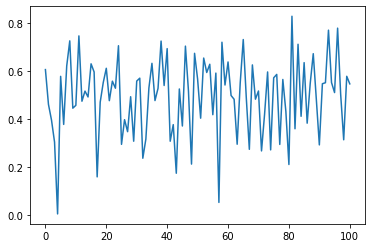

In [78]:

METHOD == 'extraction using loc'

if METHOD == 'extraction using loc[indices]':
    data = df_probs.loc[:100,'Cardiomegaly']

elif METHOD == 'extraction using iloc[indices]':
    data = df_probs.Cardiomegaly.iloc[:100]

plt.plot(data)

In [146]:
df = sns.load_dataset('car_crashes').iloc[:10]
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


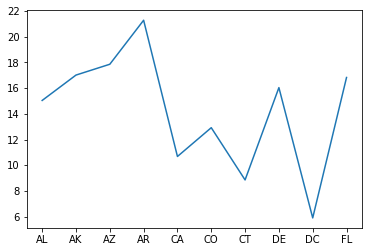

In [181]:
# df_1949 = df[df.year==1949]

METHOD = 1

if METHOD in (1,'using pandas index as row indices'):
    data_series = df.set_index('abbrev')
    data_series = data_series.no_previous

    plt.plot( data_series )

elif METHOD in (3, 'setting row indices manually'):
    rows = df.abbrev
    data = df.no_previous
    plt.plot( rows , data )

# df.set_index('abbrev')

## plotting directly with pandas

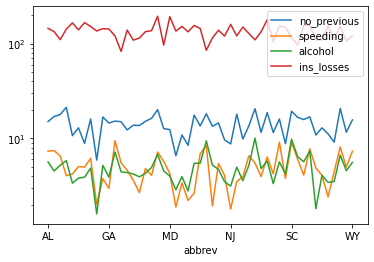

In [244]:
df = sns.load_dataset('car_crashes')

METHOD = 1

if METHOD in (1, 'plotting selected columns with respect to index list'):

    df2 = df.set_index('abbrev')
    df2[['no_previous','speeding','alcohol','ins_losses']].plot()
    plt.yscale('log')

elif METHOD in (2,'plotting series separately'):

    df2['no_previous'].plot(color='green', style='-',  legend=True)
    df2['speeding'].plot(   color='blue',  style='-',  legend=True)
    df2['alcohol'].plot(    color='red',   style='.-', legend=True)
    df2['ins_losses'].plot( color='black', style='.-', legend=True)
    plt.yscale('log')

elif METHOD in (3, 'plotting whole dataframe with respect to index list'):  

    df.plot(x='abbrev')
    plt.yscale('log')

## scatter plot

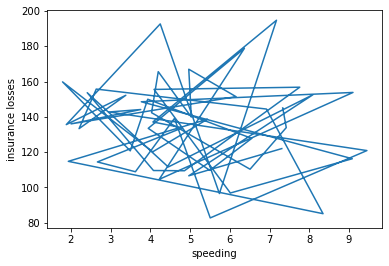

In [236]:
df = sns.load_dataset('car_crashes')

METHOD = 1
if METHOD in (1,'plotting a pandas series with respect to its indices'):

    df2 = df.set_index('speeding')
    df2['ins_losses'].plot()
    plt.ylabel('insurance losses')

elif METHOD in (2,'inserting column names as horizontal and vertical axis'):
    df.plot(x='speeding', y='ins_losses', kind='scatter')

## box plot

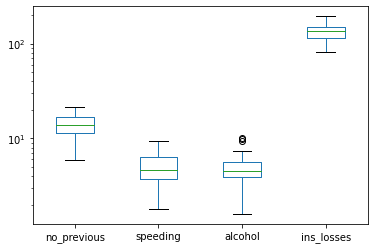

In [276]:
df.plot(y=['no_previous','speeding','alcohol','ins_losses'], kind='box')
plt.yscale('log')

## saving the plots

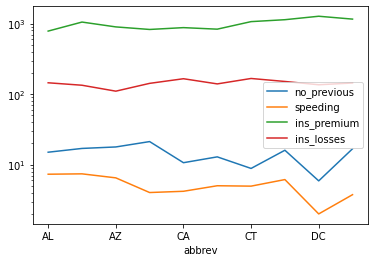

In [173]:
df2[['no_previous','speeding','ins_premium','ins_losses']].plot()
plt.yscale('log')

plt.savefig('figure.jpg')
plt.savefig('figure.pdf')

## histogram

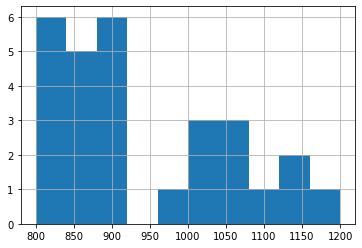

In [296]:

METHOD = 2

if METHOD in (1, 'using pd.plot(kind=hist)'):

    df2.plot(y='ins_premium', kind='hist', bins=10, range=(800,1200))


elif METHOD in (2, 'using pd.hist()'):

    df2.ins_premium.hist(bins=10, range=(800,1200))

##  cumulative density function (CDF)

<AxesSubplot:ylabel='Frequency'>

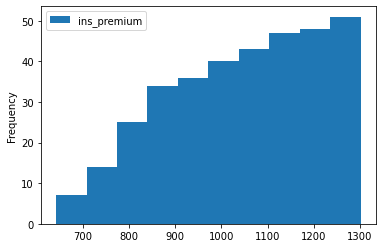

In [278]:
df2.plot(y='ins_premium', kind='hist', bins=10, cumulative=True)